In [1]:
import shap
import pandas as pd
import pickle

model = pickle.load(open("models/xgboost_churn_model.pkl", "rb"))
df = pd.read_csv("data/processed/customer_features_rfm.csv")

X = df.drop(['customer_id', 'churn'], axis=1)


In [2]:
explainer = shap.Explainer(
    model.predict_proba,
    X,
    feature_names=X.columns
)

shap_values = explainer(X)


ExactExplainer explainer: 4313it [00:31, 123.91it/s]                                                                   


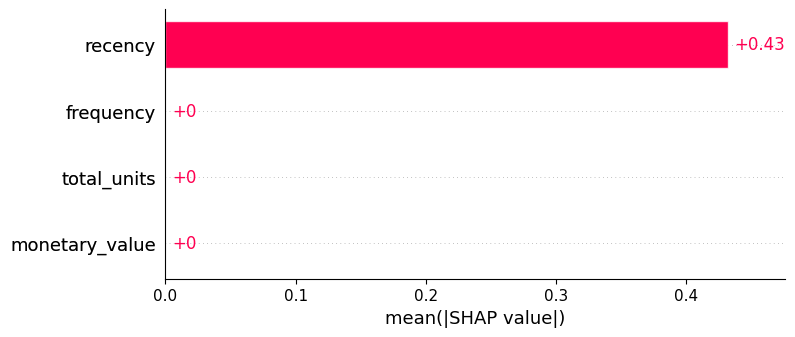

In [3]:
shap.plots.bar(shap_values[:, :, 1])


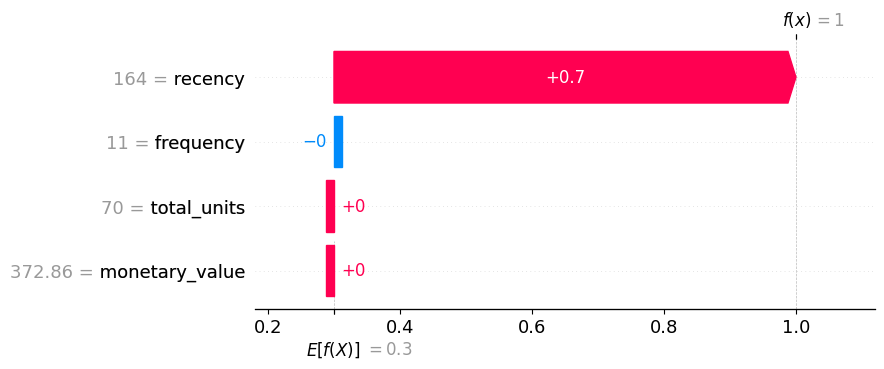

In [4]:
shap.plots.waterfall(shap_values[0, :, 1])
